# Detailed Explanation of Lasso and Related Methods
This notebook provides a detailed explanation of penalization methods for linear regression models, focusing on Lasso and related techniques.

## 1.1 Best Subset Selection
**Core Concept:**
Best Subset Selection involves selecting a small subset of covariates that are most relevant to predicting the outcome. The model is fitted for all possible subsets, but this becomes computationally infeasible when there are too many predictors (as in economic growth studies with 62 explanatory variables).

**Application in Economics:**
This method is often used when you want to explore which economic factors (like inflation, unemployment, etc.) most strongly influence a dependent variable (e.g., GDP growth). However, computing all possible regressions is impractical for large datasets.

## 1.2 Lasso (Least Absolute Shrinkage and Selection Operator)
**Core Concept:**
Lasso is a penalized regression method where the objective is to minimize the residual sum of squares subject to a constraint on the sum of absolute values of the coefficients. The penalty term encourages sparsity (many coefficients becoming zero).

$$\hat{\beta}(\lambda) = \arg\min_b \left( \frac{1}{n} \sum_{i=1}^{n} (Y_i - X_i' \beta)^2 + \lambda \|\beta\|_1 \right)$$

**Economic Interpretation:**
Lasso is used in econometrics to identify the most significant predictors of an outcome while reducing overfitting. For instance, when analyzing wage determinants, Lasso can help identify the most impactful factors, such as education and experience, by shrinking the less important variables to zero.

In [1]:
from sklearn.linear_model import Lasso
import numpy as np

# Simulate data: Let's assume we're analyzing the effect of different factors on wages
np.random.seed(42)
n = 100
p = 10
X = np.random.randn(n, p)  # Predictor variables
beta_true = np.array([1, 0, 0, 0, 2, 0, 0, 0, 0, 0])  # True coefficients
Y = X.dot(beta_true) + np.random.randn(n)  # Dependent variable with noise

# Lasso regression
lasso = Lasso(alpha=0.1)  # alpha corresponds to λ in the Lasso formula
lasso.fit(X, Y)

print('Lasso Coefficients:', lasso.coef_)

Lasso Coefficients: [ 0.80799753 -0.         -0.          0.          1.7721473   0.
 -0.0774517  -0.          0.         -0.        ]


## 1.2.1 Lasso Mechanics
**Core Concept:**
Lasso provides a convex optimization approach to penalized regression, which is a relaxation of the **Best Subset Selection** problem. The solution tends to shrink coefficients to zero, selecting the most relevant covariates.

**Economic Interpretation:**
In economics, Lasso allows us to apply variable selection efficiently in large datasets, such as those involving multiple economic indicators. It ensures that the model is not overfitting, which is crucial when predicting complex outcomes like GDP growth or income levels.

## 1.2.2 Lasso as Robust OLS
**Core Concept:**
Lasso is interpreted as a **robust OLS** because it is less sensitive to outliers, which are common in economic data.

**Economic Interpretation:**
Outliers, such as extreme values in income or market conditions, can distort OLS estimates. Lasso helps by shrinking these outlier effects and stabilizing the estimates.

## 1.2.3 Computation
**Core Concept:**
Lasso can be solved using **Coordinate Descent** or **Least Angle Regression (LARS)**. These methods are efficient for solving the convex Lasso optimization problem.

**Economic Interpretation:**
Efficient computation allows economists to apply Lasso to large datasets of economic indicators, ensuring quick processing even when there are many predictors.

## 1.2.4 Choosing λ (Regularization Parameter)
**Core Concept:**
The penalty parameter λ controls the trade-off between bias and variance. A small λ results in a model similar to OLS (low bias, high variance), and a large λ reduces variance but introduces bias.

**Economic Interpretation:**
Choosing the right λ ensures that the model is both stable and accurate. For instance, in predicting wages, λ should be selected so that only the most important predictors are included without overfitting.

In [2]:
from sklearn.linear_model import LassoCV

# Cross-validation to find the optimal lambda (alpha)
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X, Y)

print('Best lambda:', lasso_cv.alpha_)

Best lambda: 0.13279971644204647


## 1.3 Variations of Lasso
**Core Concept:**
Lasso has variations like **Post-Lasso**, **Partial Penalization**, and **Double Lasso** which refine variable selection and handle endogeneity.

**Post-Lasso:**
After Lasso selects variables, OLS is run on the selected variables to avoid shrinkage bias.

**Double Lasso:**
This procedure uses Lasso twice to deal with endogeneity and select the correct variables for both the treatment and outcome variables.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Load the Diabetes Dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [15]:
# Standardize the features (important for Lasso since regularization depends on the scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply LassoCV to find the best regularization parameter (lambda/alpha)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Display the coefficients for each feature
print("Lasso Coefficients:")
for coef, name in zip(lasso.coef_, diabetes.feature_names):
    print(f"{name}: {coef:.4f}")

Lasso Coefficients:
age: 0.0000
sex: -7.9988
bmi: 26.3575
bp: 14.8227
s1: -4.8451
s2: -0.0000
s3: -11.1843
s4: 0.0000
s5: 21.9078
s6: 1.7562


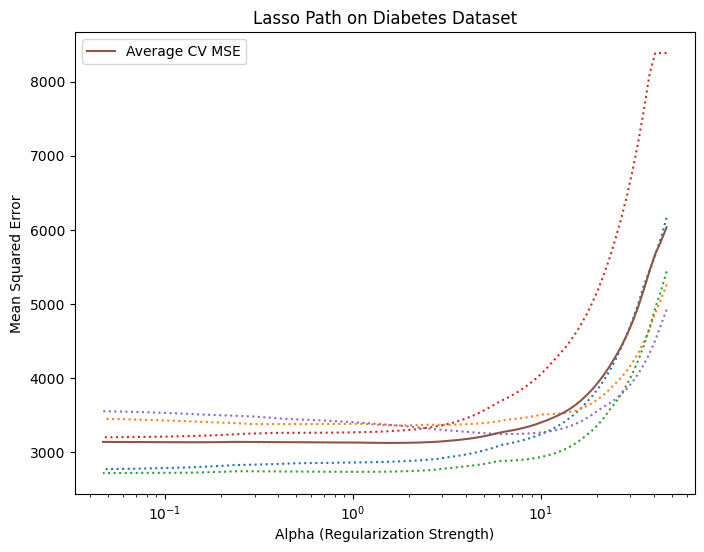

Test R^2 Score: 0.47


In [17]:
# Plot the Lasso path: Mean Squared Error vs. Regularization Strength (alpha)
plt.figure(figsize=(8, 6))
plt.plot(lasso.alphas_, lasso.mse_path_, ':')
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=-1), label="Average CV MSE")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.title("Lasso Path on Diabetes Dataset")
plt.legend()
plt.xscale("log")
plt.show()

# Evaluate the model on the test set using the R^2 score
score = lasso.score(X_test, y_test)
print(f"Test R^2 Score: {score:.2f}")